# Description of the program
## Read training data and then train a ML model by a group of user data and then test the model accuracy
## Update the trained model by the profiles that are are projected by new random matrix

In [1]:
#Read all data [194 users' oversampled data]
import csv
import pandas as pd
dataset=pd.read_csv('Dataset\OversampledVoiceData.csv',index_col=0)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,96,97,98,99,100,101,102,103,104,Label
0,0.582305,-0.091624,-0.113317,0.069735,-0.056116,0.071154,-0.146473,0.049818,0.002500,0.020655,...,0.137189,-0.202803,-0.061708,-0.239653,0.033237,0.097121,0.090061,-0.064359,-0.222110,0
1,0.403713,-0.178570,0.066751,-0.055265,-0.010389,0.041391,0.013069,0.018638,-0.047548,-0.012591,...,0.434401,0.033208,-0.172818,0.005580,0.126595,-0.084699,-0.008194,-0.019724,-0.256300,0
2,0.400374,-0.185792,0.012088,-0.067337,0.038272,0.049996,0.012814,-0.025244,-0.030817,-0.068128,...,0.156473,0.000591,-0.124143,-0.129319,0.004072,-0.046710,-0.008062,0.001104,-0.075796,0
3,0.477862,-0.018475,0.071872,-0.000463,-0.016150,-0.035783,0.070162,-0.061627,-0.107956,-0.082812,...,0.127110,0.179423,-0.115302,0.104676,-0.107193,0.209552,0.027887,0.117224,0.104110,0
4,0.465657,-0.029432,-0.029614,0.028301,0.067341,-0.131359,0.090756,-0.053325,-0.038439,0.009342,...,0.122469,-0.361710,-0.096674,0.032555,0.192928,-0.012668,0.027907,-0.094648,0.170670,0


In [2]:
#replace the user Level by class name and count the number of sample in each class
#dataset['Label'] = pd.factorize(dataset['Label'])[0]
dataset.groupby(['Label'])['Label'].count()

Label
0     200
1     200
2     200
3     200
4     200
     ... 
81    200
82    200
83    200
84    200
85    200
Name: Label, Length: 86, dtype: int64

In [3]:
#seperate the profile in two groups: (i) Training profile (0-43), and (ii) auxiliary profile (43-86)
totalUser= len(pd.unique(dataset['Label']))
trainingData = dataset[dataset['Label'] < 68]
auxilaryData = dataset[dataset['Label'] >= 68]
print("Total user in training dataset:", len(pd.unique(trainingData['Label'])))
print("Total user in auxiliary dataset:", len(pd.unique(auxilaryData['Label'])))

Total user in training dataset: 68
Total user in auxiliary dataset: 18


In [4]:
#total use in the system
totalUser= len(pd.unique(dataset['Label']))
#trainingData=dataset
print("Total user in the training dataset:", len(pd.unique(trainingData['Label'])))

Total user in the training dataset: 68


In [5]:
#Seperate the data for model training and attack
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


Modeldataset, Updatedataset= train_test_split(trainingData,test_size=0.2, random_state=22)
#ytrain = to_categorical(Modeldataset)
#ytest = to_categorical()
print(Modeldataset.shape)
print(Updatedataset.shape)

(10880, 105)
(2720, 105)


In [6]:
#Random project the model dataset
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94']
ModeldatasetRP = pd.DataFrame(columns=column1)

for seed in range(0, 68):
    rng = np.random.RandomState(seed)
    X = Modeldataset[Modeldataset['Label'] == seed]

    if len(X) > 0:
        transformer = SparseRandomProjection(n_components=94, random_state=rng)
        Xdata = X.drop(columns=['Label'])
        XRP = pd.DataFrame(transformer.fit_transform(Xdata), columns=column2)
        XRP['Label'] = seed
        ModeldatasetRP = pd.concat([ModeldatasetRP, XRP], ignore_index=True)


print(Modeldataset.shape)
print(ModeldatasetRP.shape)


C:\Users\mdmor\AppData\Local\Temp\ipykernel_17008\2069622064.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ModeldatasetRP = pd.concat([ModeldatasetRP, XRP], ignore_index=True)


(10880, 105)
(10880, 95)


In [7]:
#Prepare the traning data for training and testing the model
import tensorflow
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

X=ModeldatasetRP.drop(columns=['Label'])
y=ModeldatasetRP['Label']

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.1, random_state=22)
#Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.1, random_state=22)

ytrain = to_categorical(ytrain)
yval = to_categorical(yval)
#ytest = to_categorical(ytest)

In [8]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xval.shape)
print(yval.shape)
#print(Xtest.shape)
#print(ytest.shape)

(9792, 94)
(9792, 68)
(1088, 94)
(1088, 68)


In [9]:
# import all necessary package for a neural network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inlineimport keras
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
#from tqdm import tqdm
#from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
#import torch.nn.functional as F

In [10]:
#define optimizers for neural network
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(learning_rate=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(learning_rate=0.001, rho=0.9)

In [11]:
#neural network architecture for model training

def create_classifierRP(release=False,totalClass=68):
  classifier = Sequential()
  classifier.add(Dense(64, input_dim=94))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.5))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.2))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))
  #classifier.add(Dropout(0.2))

  #classifier.add(Dense(256))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('relu'))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))
  classifier.add(Dropout(0.2))

  #if release:
  classifier.add(Dense(totalClass, activation='softmax'))
  #else:
  #   classifier.add(Dense(Tuser))
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifierRP()
Clasf.summary()

C:\Users\mdmor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 68)             │         4,420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,100 (109.77 KB)

 Trainable params: 27,588 (107.77 KB)

 Non-trainable params: 512 (2.00 KB)

In [12]:
#Train the classifier seperately for black-box attack
import keras

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier2= create_classifierRP(True,68)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
Classfier2.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc2 =  Classfier2.fit(Xtrain, ytrain, batch_size=64, epochs=20, validation_data=(Xval, yval),verbose=1)

Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1547 - loss: 3.7543 - val_accuracy: 0.9770 - val_loss: 2.6756
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6556 - loss: 1.9435 - val_accuracy: 1.0000 - val_loss: 0.6796
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7960 - loss: 1.0699 - val_accuracy: 1.0000 - val_loss: 0.1037
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8488 - loss: 0.6917 - val_accuracy: 1.0000 - val_loss: 0.0224
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8805 - loss: 0.4841 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8864 - loss: 0.4206 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9038 - loss: 0.3542 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9169 - loss: 0.3127 - val_accuracy: 1.

Text(0.5, 0, 'epochs')

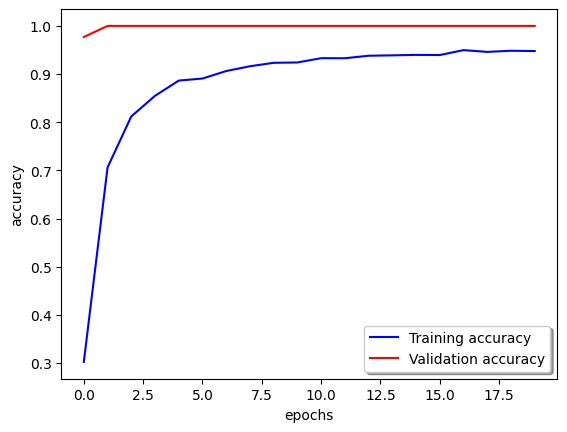

In [13]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc2.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

In [14]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/VoiceDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 68]
#testdataset.head()

In [15]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94']
testdatasetRP = pd.DataFrame(columns=column1)

for seed in range(0,68):
    rng = np.random.RandomState(seed)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=94, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testdatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_17008\1809165616.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)


(1639, 105)
(1639, 95)


In [16]:
Xtest=testdatasetRP.drop(columns=['Label'])
ytest=testdatasetRP['Label']
ytest = to_categorical(ytest)

In [17]:
#Performance of the classifier
Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier2.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 5.2851e-05
Loss: 6.374515214702114e-05
Accuracy: 1.0


In [18]:
#save the Model
from keras.models import load_model
keras.backend.clear_session()
filename = 'Dataset/UserModel1.h5'
Classfier2.save(filename)
#UserModel = load_model(filename)

# Model Update: Update the model by newly projected data

In [19]:
#load  the Model
from keras.models import load_model
keras.backend.clear_session()
filename = 'Dataset/UserModel1.h5'
#Classfier2.save(filename)
UserModel = load_model(filename)

In [20]:
#Random project the Attack dataset
import numpy as np
from sklearn.random_projection import SparseRandomProjection

column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94']

UpdatedatasetRP = pd.DataFrame(columns=column1)
for seed in range(0,68):
    rng = np.random.RandomState(seed+1)
    X = Updatedataset[Updatedataset['Label']==seed]
    if len(X) > 0:
      transformer = SparseRandomProjection(n_components=94, random_state=rng)
      Xdata=X.drop(columns=['Label'])
      XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
      XRP['Label']=seed
      UpdatedatasetRP = pd.concat([UpdatedatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(Updatedataset.shape)
print(UpdatedatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_17008\2562690898.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  UpdatedatasetRP = pd.concat([UpdatedatasetRP, XRP], ignore_index=True)


(2720, 105)
(2720, 95)


In [21]:
#Performance of the classifier (No need)
XUpdatedataset=UpdatedatasetRP.drop(columns=['Label'])
yUpdatedataset=UpdatedatasetRP['Label']
yUpdatedataset=to_categorical(yUpdatedataset)

#Classfier2.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = UserModel.evaluate(XUpdatedataset, yUpdatedataset)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 19.4046  
Loss: 18.87262535095215
Accuracy: 0.0


In [22]:
X=UpdatedatasetRP.drop(columns=['Label'])
y=UpdatedatasetRP['Label']

XUpdate, XUpdateval, yUpdate, yUpdateval = train_test_split(X, y, test_size=0.1, random_state=22)
#XUpdate, XUpdateval, yUpdate, yUpdateval = train_test_split(XUpdate, yUpdate, test_size=0.1, random_state=22)

yUpdate = to_categorical(yUpdate)
yUpdateval = to_categorical(yUpdateval)
#yUpdatetest = to_categorical(yUpdatetest)

In [23]:
print(XUpdate.shape)
print(yUpdate.shape)
print(XUpdateval.shape)
print(yUpdateval.shape)
#print(XUpdatetest.shape)
#print(yUpdatetest.shape)

(2448, 94)
(2448, 68)
(272, 94)
(272, 68)


In [24]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(learning_rate=0.001, rho=0.9)
UserModel.compile(loss=lossc, optimizer=optimizerc,metrics=['accuracy'])
#------Comments will end from here
historyc3=UserModel.fit(XUpdate, yUpdate, batch_size=64, epochs=30, validation_data=(XUpdateval, yUpdateval))

Epoch 1/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0059 - loss: 15.8360 - val_accuracy: 0.0037 - val_loss: 10.2307
Epoch 2/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0421 - loss: 8.7926 - val_accuracy: 0.1765 - val_loss: 4.0065
Epoch 3/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1782 - loss: 4.6334 - val_accuracy: 0.6397 - val_loss: 1.1527
Epoch 4/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3726 - loss: 2.6696 - val_accuracy: 0.8824 - val_loss: 0.3914
Epoch 5/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5233 - loss: 1.6889 - val_accuracy: 0.9632 - val_loss: 0.1676
Epoch 6/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6016 - loss: 1.3617 - val_accuracy: 0.9963 - val_loss: 0.0881
Epoch 7/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6837 - loss: 1.1006 - val_accuracy: 1.0000 - val_loss: 0.0512
Epoch 8/30
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7169 - loss: 0.9678 - val_accuracy: 1.0000 - val_lo

Text(0.5, 0, 'epochs')

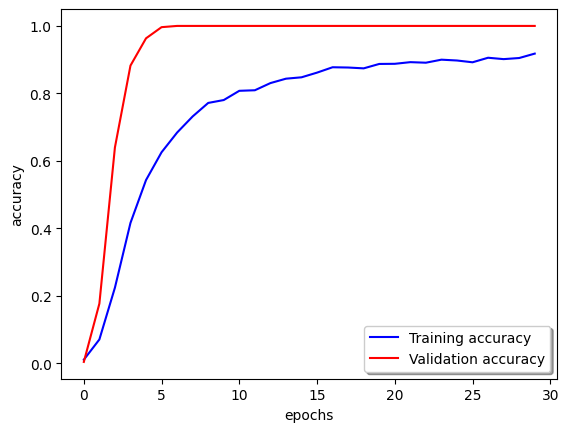

In [25]:
# Plot the classifier loss and accuracy curves for training and validation data
import matplotlib.pyplot as plt
plt.plot(historyc3.history['accuracy'], color='b', label="Training accuracy")
plt.plot(historyc3.history['val_accuracy'], color='r',label="Validation accuracy")
legend = plt.legend(loc='best', shadow=True)
plt.ylabel('accuracy')
plt.xlabel('epochs')

# Correctness test of updated model: Updated model test by same random mareix

In [26]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/VoiceDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 68]
#testdataset.head()

In [27]:
column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94']
testdatasetRP = pd.DataFrame(columns=column1)
for seed in range(0,68):
    rng = np.random.RandomState(seed+1)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=94, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testdatasetRP.shape)

C:\Users\mdmor\AppData\Local\Temp\ipykernel_17008\1694249453.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)


(1639, 105)
(1639, 95)


In [28]:
Xtest=testdatasetRP.drop(columns=['Label'])
ytest=testdatasetRP['Label']
ytest = to_categorical(ytest)

In [29]:
#Performance of the classifier
#UserModel.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = UserModel.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.7794e-04
Loss: 0.0007312327506951988
Accuracy: 1.0


# Security test of updated model: Updated model test by different random mareix?

In [33]:
#read the test data and seperate test data
import csv
import pandas as pd
testdataset=pd.read_csv('Dataset/VoiceDatatest.csv',index_col=0)
testdataset = testdataset[testdataset['Label'] < 68]
#testdataset.head()

In [73]:
column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94','Label']
column2=column1=['RPF1', 'RPF2', 'RPF3', 'RPF4', 'RPF5', 'RPF6', 'RPF7', 'RPF8', 'RPF9', 'RPF10', 'RPF11', 'RPF12', 'RPF13', 'RPF14', 'RPF15', 'RPF16', 'RPF17', 'RPF18',
         'RPF19', 'RPF20', 'RPF21', 'RPF22', 'RPF23', 'RPF24', 'RPF25', 'RPF26', 'RPF27', 'RPF28', 'RPF29', 'RPF30', 'RPF31', 'RPF32', 'RPF33', 'RPF34', 'RPF35',
         'RPF36', 'RPF37', 'RPF38', 'RPF39', 'RPF40', 'RPF41', 'RPF42', 'RPF43', 'RPF44', 'RPF45', 'RPF46', 'RPF47', 'RPF48', 'RPF49', 'RPF50', 'RPF51', 'RPF52',
         'RPF53', 'RPF54', 'RPF55', 'RPF56', 'RPF57', 'RPF58', 'RPF59', 'RPF60', 'RPF61', 'RPF62', 'RPF63', 'RPF64', 'RPF65', 'RPF66', 'RPF67', 'RPF68', 'RPF69',
         'RPF70', 'RPF71', 'RPF72', 'RPF73', 'RPF74', 'RPF75', 'RPF76', 'RPF77', 'RPF78', 'RPF79', 'RPF80', 'RPF81', 'RPF82', 'RPF83', 'RPF84', 'RPF85', 'RPF86',
         'RPF87', 'RPF88', 'RPF89', 'RPF90', 'RPF91', 'RPF92', 'RPF93', 'RPF94']
testdatasetRP = pd.DataFrame(columns=column1)
for seed in range(0,68):
    rng = np.random.RandomState(seed)
    X = testdataset[testdataset['Label']==seed]
    transformer = SparseRandomProjection(n_components=94, random_state=rng)
    Xdata=X.drop(columns=['Label'])
    XRP = pd.DataFrame(transformer.fit_transform(Xdata),columns=column2)
    XRP['Label']=seed
    testdatasetRP = pd.concat([testdatasetRP, XRP], ignore_index=True)
    #print("Shape of Actual data:",Xdata.shape)
    #print("Shape of Randome Matrix:", transformer.components_.shape[1],transformer.components_.shape[0])
    #print("Shape of Projected data:", X_new.shape)
print(testdataset.shape)
print(testdatasetRP.shape)

(1639, 105)
(1639, 95)


In [34]:
Xtest=testdatasetRP.drop(columns=['Label'])
ytest=testdatasetRP['Label']
ytest = to_categorical(ytest)

In [35]:
#Performance of the classifier
#UserModel.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = UserModel.evaluate(Xtest, ytest)
#print('Test score:', score)
print('Loss:', loss)
print('Accuracy:', accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.7794e-04
Loss: 0.0007312327506951988
Accuracy: 1.0
